In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy import stats
plt.style.use('figure.mplstyle')

In [2]:
exps = ['Enriched','Dissimilar','Similar']
colors = ['tab:red','tab:blue','tab:green']
palettes = [['tab:red','dimgray'],
            ['tab:blue','dimgray'],
            ['tab:green','dimgray']]
npyfiles = [r'D:\LW_Alldata\SI_Transient\pair_correlations_day1.npy',
            r'D:\LW_Alldata\SI_Transient\pair_correlations_day1_shuffled.npy']
results = np.load(npyfiles[0], allow_pickle=True).item()
results2 = np.load(npyfiles[1], allow_pickle=True).item()

Fam original vs shuffled, paired t-test (one-sided) p=0.0287981
Nov original vs shuffled, paired t-test (one-sided) p=0.0554805
Fam original vs shuffled, paired t-test (one-sided) p=0.0159143
Nov original vs shuffled, paired t-test (one-sided) p=0.0980642
Fam original vs shuffled, paired t-test (one-sided) p=0.00392278
Nov original vs shuffled, paired t-test (one-sided) p=0.00515847


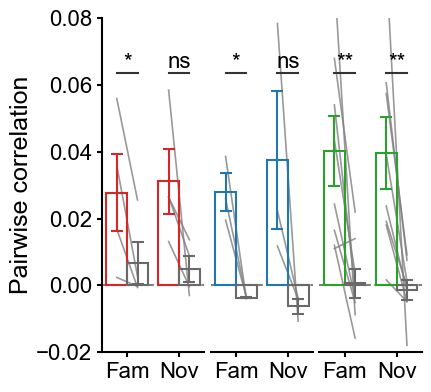

In [3]:
def plot_summary(res, res2, palette, fig=None, ax=None):
    
    fsize = plt.rcParams['font.size']
    lwidth = plt.rcParams['axes.linewidth']
    if fig is None:
        fig = plt.figure(figsize=(3,4))
    if ax is None:
        ax = plt.gca()
    
    n_mice = len(res)
    corrs = np.zeros((n_mice,2))  # Original Fam/Nov
    corrs2 = np.zeros((n_mice,2))  # Shuffled Fam/Nov
    for m in range(n_mice):
        corrs[m] = np.nanmean(res[m], axis=1)
        corrs2[m] = np.nanmean(res2[m], axis=1)
        
    df = pd.DataFrame({'Correlation': list(corrs.ravel()) + list(corrs2.ravel()),
                       'Context': ['Fam','Nov']*2*n_mice,
                       'Data': ['Original']*2*n_mice + ['Shuffled']*2*n_mice})
    
    pairs = [(('Fam','Original'),('Fam','Shuffled')),
             (('Nov','Original'),('Nov','Shuffled'))]  # (('Fam','Original'),('Nov','Original'))
    pvalues = [stats.ttest_rel(df['Correlation'][(df['Context']=='Fam')&(df['Data']=='Original')],
                               df['Correlation'][(df['Context']=='Fam')&(df['Data']=='Shuffled')], alternative='greater')[1],
               stats.ttest_rel(df['Correlation'][(df['Context']=='Nov')&(df['Data']=='Original')],
                               df['Correlation'][(df['Context']=='Nov')&(df['Data']=='Shuffled')], alternative='greater')[1]]
    print('Fam original vs shuffled, paired t-test (one-sided) p=%.6g' % pvalues[0])
    print('Nov original vs shuffled, paired t-test (one-sided) p=%.6g' % pvalues[1])
    
    ff = 0.8  # Fill factor
    width = ff/2  # Bar width
    ax.axhline(0, ls='--', c='gray', zorder=-2)

    ## Draw paired lines
    for c in range(2):  # Fam/Nov
        pos = np.arange(c-ff/2+width/2, c+ff/2, width)
        for m in range(n_mice):
            ax.plot(pos, [corrs[m,c], corrs2[m,c]], lw=1.2, c='gray', alpha=0.8, zorder=-1)  # marker='o', ms=4, mfc='none',
        
    ## Draw bar plot
    for b in range(2):  # Original/Shuffled
        x = np.arange(2) + (-ff/2 + width/2 + b*width)
        if b == 0:
            height = np.mean(corrs, axis=0)
            error = stats.sem(corrs, axis=0)
        else:
            height = np.mean(corrs2, axis=0)
            error = stats.sem(corrs2, axis=0)
        ax.bar(x, height, yerr=error, width=width, color='none', linewidth=lwidth, 
               edgecolor=palette[b], ecolor=palette[b], capsize=4,
               error_kw=dict(elinewidth=lwidth, capthick=lwidth))
    
    pformat = {'pvalue_thresholds':[[1e-3,'***'],[1e-2,'**'],[0.05,'*'],[1,'ns']], 'fontsize':fsize}
    annot = Annotator(ax, pairs, data=df, x='Context', y='Correlation', hue='Data', verbose=False)
    annot.configure(test=None, loc='outside', line_height=0., line_width=lwidth, pvalue_format=pformat)
    annot.set_pvalues(pvalues)
    annot.annotate()
    return df

fig, axs = plt.subplots(1,len(exps),sharey=True,figsize=(4.6,4.2))
for p, exp in enumerate(exps):
    res = results[exp]
    res2 = results2[exp]
    df = plot_summary(res, res2, palettes[p], fig=fig, ax=axs[p])
    axs[p].set(xticks=[0,1], xticklabels=['Fam','Nov'])
axs[0].set(ylabel='Pairwise correlation', ylim=[-0.02,0.08])  # , yticks=np.arange(0,130,20)
for p in range(1,len(exps)):
    axs[p].axes.get_yaxis().set_visible(False)
    axs[p].spines['left'].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(wspace=0.06)
# fig.savefig('Decoder error summary.svg')

Fam vs Nov, paired t-test (two-sided) p=0.754509
Fam vs Nov, paired t-test (two-sided) p=0.720814
Fam vs Nov, paired t-test (two-sided) p=0.953620


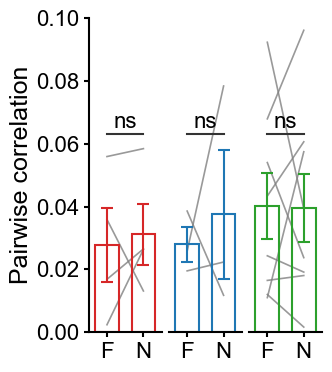

In [4]:
def plot_comparison(res, color, ax):
    
    fsize = plt.rcParams['font.size']
    lwidth = plt.rcParams['axes.linewidth']
    n_mice = len(res)
    corrs = np.zeros((n_mice,2))  # Original Fam/Nov
    for m in range(n_mice):
        corrs[m] = np.nanmean(res[m], axis=1)
    df = pd.DataFrame({'Correlation': corrs.ravel(),
                       'Context': ['Fam','Nov']*n_mice})
    
    ## Draw paired lines
    pos = np.arange(2)
    for m in range(n_mice):
        ax.plot(pos, corrs[m], lw=1.2, c='gray', alpha=0.8, zorder=-1)  # marker='o', ms=4, mfc='none',
    
    ## Draw bar plot
    width = 0.65  # Bar width
    height = np.mean(corrs, axis=0)
    error = stats.sem(corrs, axis=0)
    ax.bar(pos, height, yerr=error, width=width, color='none', linewidth=lwidth, 
           edgecolor=color, ecolor=color, capsize=4,
           error_kw=dict(elinewidth=lwidth, capthick=lwidth))
    
    pairs = [('Fam','Nov')]
    pvalues = [stats.ttest_rel(df['Correlation'][df['Context']=='Fam'],
                               df['Correlation'][df['Context']=='Nov'])[1]]
    print('Fam vs Nov, paired t-test (two-sided) p=%.6f' % pvalues[0])
    pformat = {'pvalue_thresholds':[[1e-3,'***'],[1e-2,'**'],[0.05,'*'],[1,'ns']], 'fontsize':fsize}
    annot = Annotator(ax, pairs, data=df, x='Context', y='Correlation', verbose=False)
    annot.configure(test=None, loc='outside', line_height=0., line_width=lwidth, pvalue_format=pformat)
    annot.set_pvalues(pvalues)
    annot.annotate()
    return df

fig, axs = plt.subplots(1,len(exps),sharey=True,figsize=(3.6,4.))
for p, exp in enumerate(exps):
    df = plot_comparison(results[exp], colors[p], axs[p])
    axs[p].set(xlim=[-0.5,1.5], xticks=[0,1], xticklabels=['F','N'])
axs[0].set(ylabel='Pairwise correlation', ylim=[0,0.1])
for p in range(1,len(exps)):
    axs[p].axes.get_yaxis().set_visible(False)
    axs[p].spines['left'].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
# fig.savefig('Pairwise correlation fam-nov.svg')

Original vs Shuffled, paired t-test p=0.007783
Original vs Shuffled, paired t-test p=0.018103
Original vs Shuffled, paired t-test p=0.000103


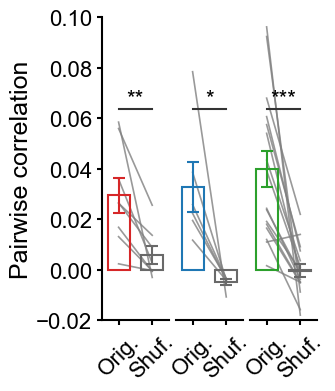

In [5]:
def plot_pooled(res, res2, palette, ax):
    fsize = plt.rcParams['font.size']
    lwidth = plt.rcParams['axes.linewidth']
    n_mice = len(res)
    corrs = np.zeros((n_mice,2))  # Original Fam/Nov
    corrs2 = np.zeros((n_mice,2))  # Shuffled Fam/Nov
    for m in range(n_mice):
        corrs[m] = np.nanmean(res[m], axis=1)
        corrs2[m] = np.nanmean(res2[m], axis=1)
    df = pd.DataFrame({'Correlation': list(corrs.ravel()) + list(corrs2.ravel()),
                       'Data': ['Original']*2*n_mice + ['Shuffled']*2*n_mice})
    
    ## Draw paired lines
    pos = np.arange(2)
    for m in range(n_mice):
        for c in range(2):
            ax.plot(pos, [corrs[m,c], corrs2[m,c]], lw=1.2, c='gray', alpha=0.8, zorder=-1)  # marker='o', ms=4, mfc='none',
    
    ## Draw bar plot
    width = 0.65  # Bar width
    height = [np.mean(corrs.ravel()), np.mean(corrs2.ravel())]
    error = [stats.sem(corrs.ravel()), stats.sem(corrs2.ravel())]
    for b in range(2):
        ax.bar(pos[b], height[b], yerr=error[b], width=width, color='none', linewidth=lwidth, 
               edgecolor=palette[b], ecolor=palette[b], capsize=4,
               error_kw=dict(elinewidth=lwidth, capthick=lwidth))
    
    pairs = [('Original','Shuffled')]
    pvalues = [stats.ttest_rel(df['Correlation'][df['Data']=='Original'],
                               df['Correlation'][df['Data']=='Shuffled'])[1]]
    print('Original vs Shuffled, paired t-test p=%.6f' % pvalues[0])
    pformat = {'pvalue_thresholds':[[1e-3,'***'],[1e-2,'**'],[0.05,'*'],[1,'ns']], 'fontsize':fsize}
    annot = Annotator(ax, pairs, data=df, x='Data', y='Correlation', verbose=False)
    annot.configure(test=None, loc='outside', line_height=0., line_width=lwidth, pvalue_format=pformat)
    annot.set_pvalues(pvalues)
    annot.annotate()
    return df

fig, axs = plt.subplots(1,len(exps),sharey=True,figsize=(3.6,4.2))
for p, exp in enumerate(exps):
    df = plot_pooled(results[exp], results2[exp], palettes[p], axs[p])
    axs[p].set(xlim=[-0.5,1.5], xticks=[0,1])
    axs[p].set_xticklabels(['Orig.','Shuf.'], rotation=45)
axs[0].set(ylabel='Pairwise correlation', ylim=[-0.02,0.1])
for p in range(1,len(exps)):
    axs[p].axes.get_yaxis().set_visible(False)
    axs[p].spines['left'].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
# fig.savefig('Pairwise correlation pooled.svg')

Original vs Shuffled, paired t-test p=0.453781
Original vs Shuffled, paired t-test p=0.517318
Original vs Shuffled, paired t-test p=0.027627


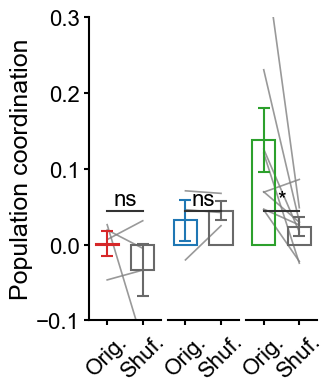

In [6]:
def plot_correlation(res, res2, palette, ax):
    fsize = plt.rcParams['font.size']
    lwidth = plt.rcParams['axes.linewidth']
    n_mice = len(res)
    PCcorr = np.zeros(n_mice)  # Correlation between Population Coordination Vectors
    PCcorr2 = np.zeros(n_mice)
    for m in range(n_mice):
        paircorr = res[m][:, np.all(np.isfinite(res[m]), axis=0)]
        paircorr2 = res2[m][:, np.all(np.isfinite(res2[m]), axis=0)]
        PCcorr[m] = stats.pearsonr(paircorr[0], paircorr[1])[0]
        PCcorr2[m] = stats.pearsonr(paircorr2[0], paircorr2[1])[0]
        
    df = pd.DataFrame({'PCcorr': list(PCcorr) + list(PCcorr2),
                       'Data': ['Original']*n_mice + ['Shuffled']*n_mice})
    
    ## Draw paired lines
    pos = np.arange(2)
    for m in range(n_mice):
        ax.plot(pos, [PCcorr[m], PCcorr2[m]], lw=1.2, c='gray', alpha=0.8, zorder=-1)  # marker='o', ms=4, mfc='none',
    
    ## Draw bar plot
    width = 0.65  # Bar width
    height = [np.mean(PCcorr), np.mean(PCcorr2)]
    error = [stats.sem(PCcorr), stats.sem(PCcorr2)]
    for b in range(2):
        ax.bar(pos[b], height[b], yerr=error[b], width=width, color='none', linewidth=lwidth, 
               edgecolor=palette[b], ecolor=palette[b], capsize=4,
               error_kw=dict(elinewidth=lwidth, capthick=lwidth))
    
    pairs = [('Original','Shuffled')]
    pvalues = [stats.ttest_rel(df['PCcorr'][df['Data']=='Original'],
                               df['PCcorr'][df['Data']=='Shuffled'])[1]]
    print('Original vs Shuffled, paired t-test p=%.6f' % pvalues[0])
    pformat = {'pvalue_thresholds':[[1e-3,'***'],[1e-2,'**'],[0.05,'*'],[1,'ns']], 'fontsize':fsize}
    annot = Annotator(ax, pairs, data=df, x='Data', y='PCcorr', verbose=False)
    annot.configure(test=None, loc='outside', line_height=0., line_width=lwidth, pvalue_format=pformat)
    annot.set_pvalues(pvalues)
    annot.annotate()
    return df

fig, axs = plt.subplots(1,len(exps),sharey=True,figsize=(3.6,4.2))
for p, exp in enumerate(exps):
    df = plot_correlation(results[exp], results2[exp], palettes[p], axs[p])
    axs[p].set(xlim=[-0.5,1.5], xticks=[0,1])
    axs[p].set_xticklabels(['Orig.','Shuf.'], rotation=45)
axs[0].set(ylabel='Population coordination', ylim=[-0.1,0.3])
for p in range(1,len(exps)):
    axs[p].axes.get_yaxis().set_visible(False)
    axs[p].spines['left'].set_visible(False)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
# fig.savefig('Population coordination.svg')